In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e7/sample_submission.csv
/kaggle/input/playground-series-s4e7/train.csv
/kaggle/input/playground-series-s4e7/test.csv


In [2]:
df = pd.read_csv("/kaggle/input/playground-series-s4e7/train.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [5]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [6]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


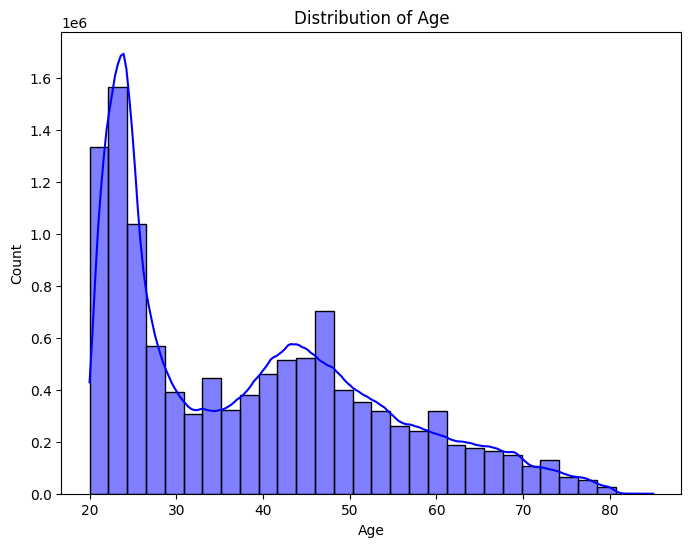

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

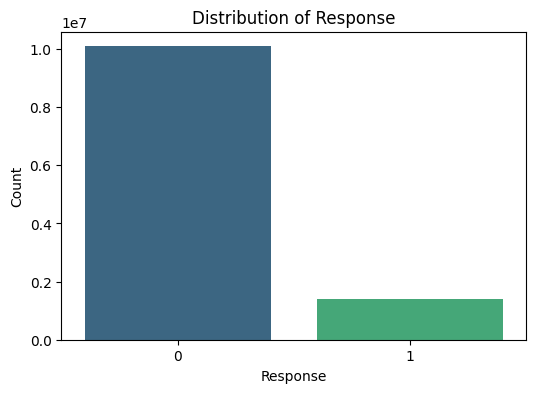

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Response', data=df, palette='viridis')
plt.title('Distribution of Response')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

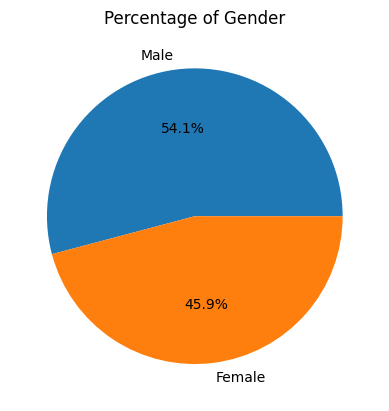

In [9]:
gender = df['Gender'].value_counts()
plt.pie(gender, labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title("Percentage of Gender")
plt.show()

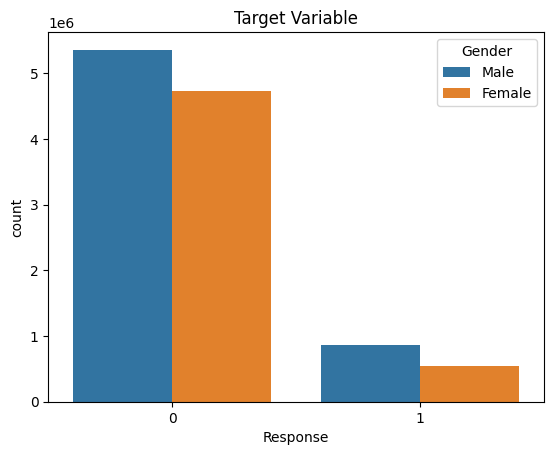

In [10]:
sns.countplot(data=df,x='Response',hue="Gender")
plt.title('Target Variable')
plt.show()

In [11]:
df['Gender'] = df['Gender'].replace(['Female', 'Male'], [0, 1])
df['Vehicle_Age'] = df['Vehicle_Age'].replace(['1-2 Year', '< 1 Year', '> 2 Years'], [0, 1, 2])
df['Vehicle_Damage'] = df['Vehicle_Damage'].replace(['No', 'Yes'], [0, 1])

/tmp/ipykernel_655/878367157.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace(['Female', 'Male'], [0, 1])
/tmp/ipykernel_655/878367157.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Vehicle_Age'] = df['Vehicle_Age'].replace(['1-2 Year', '< 1 Year', '> 2 Years'], [0, 1, 2])
/tmp/ipykernel_655/878367157.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fals

In [12]:
df.drop('id',axis=1)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,21,1,35.0,0,0,1,65101.0,124.0,187,0
1,1,43,1,28.0,0,2,1,58911.0,26.0,288,1
2,0,25,1,14.0,1,1,0,38043.0,152.0,254,0
3,0,35,1,1.0,0,0,1,2630.0,156.0,76,0
4,0,36,1,15.0,1,0,0,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...
11504793,1,48,1,6.0,0,0,1,27412.0,26.0,218,0
11504794,0,26,1,36.0,0,1,1,29509.0,152.0,115,1
11504795,0,29,1,32.0,1,1,0,2630.0,152.0,189,0
11504796,0,51,1,28.0,0,0,1,48443.0,26.0,274,1


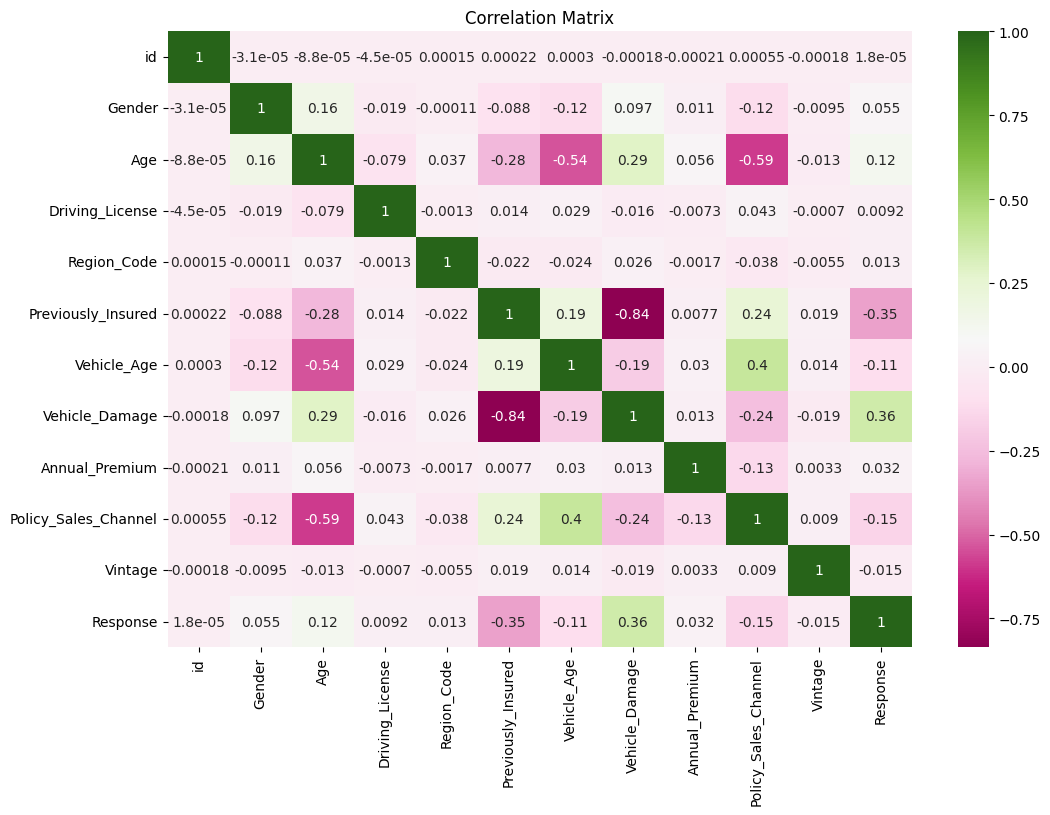

In [13]:
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='PiYG')
plt.title('Correlation Matrix')
plt.show()

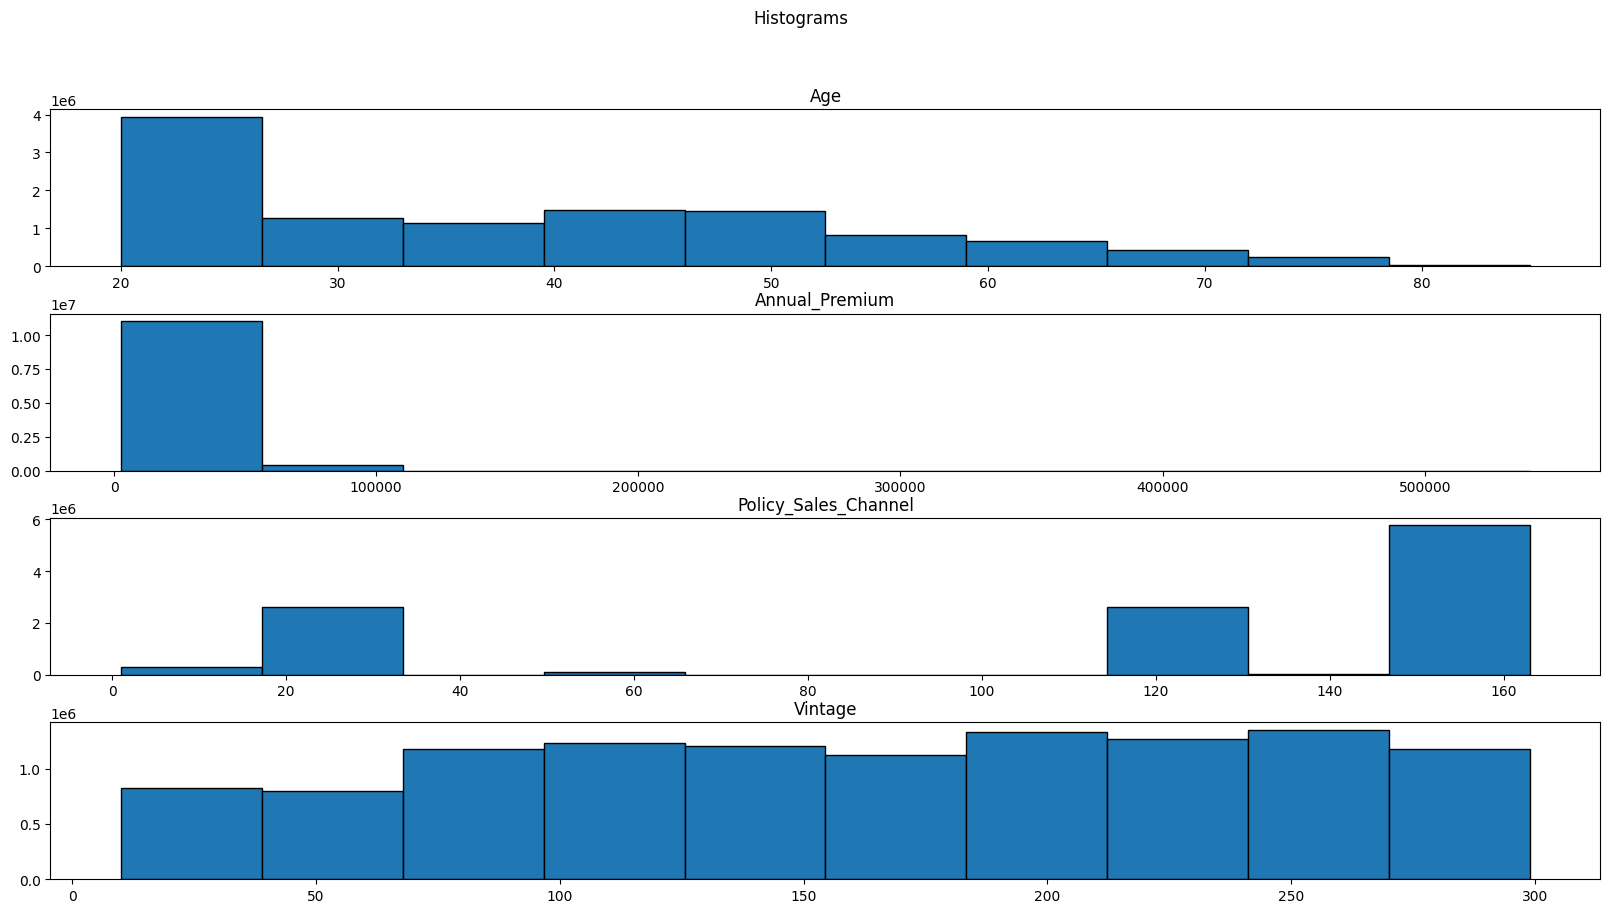

In [14]:
df.hist(column=['Age','Annual_Premium','Policy_Sales_Channel','Vintage'],figsize=(20,10),layout=(4,1),grid=False,edgecolor='black')
plt.suptitle('Histograms')
plt.show()

In [15]:
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import warnings

In [16]:
X = df.drop(['id','Response'], axis = 1)
y = df['Response']

# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1,random_state = 0)

#using min max scaler we scale the values and then transform the values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93   1009313
           1       0.30      0.00      0.00    141167

    accuracy                           0.88   1150480
   macro avg       0.59      0.50      0.47   1150480
weighted avg       0.81      0.88      0.82   1150480



In [18]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)



print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94   1009313
           1       0.57      0.09      0.16    141167

    accuracy                           0.88   1150480
   macro avg       0.73      0.54      0.55   1150480
weighted avg       0.85      0.88      0.84   1150480



In [19]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import lightgbm as lgb

In [20]:
# LightGBM
print("Training LightGBM...")
lgb_model = lgb.LGBMClassifier(n_estimators=100, n_jobs=-1)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
print("LightGBM Classification Report:")
print(classification_report(y_test, lgb_pred))

Training LightGBM...
[LightGBM] [Info] Number of positive: 1273892, number of negative: 9080426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.323682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 732
[LightGBM] [Info] Number of data points in the train set: 10354318, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.123030 -> initscore=-1.964044
[LightGBM] [Info] Start training from score -1.964044
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94   1009313
           1       0.58      0.07      0.12    141167

    accuracy                           0.88   1150480
   macro avg       0.73      0.53      0.53   1150480
weighted avg       0.85      0.88      0.84   1150480



In [21]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_pred))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.59      0.74   1009313
           1       0.25      0.98      0.40    141167

    accuracy                           0.64   1150480
   macro avg       0.62      0.79      0.57   1150480
weighted avg       0.90      0.64      0.70   1150480



In [22]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(loss='log', max_iter=1000, tol=1e-3)
sgd_model.fit(X_train, y_train)
sgd_pred = sgd_model.predict(X_test)
print("SGD Logistic Regression Classification Report:")
print(classification_report(y_test, sgd_pred))


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGD Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93   1009313
           1       0.33      0.00      0.00    141167

    accuracy                           0.88   1150480
   macro avg       0.61      0.50      0.47   1150480
weighted avg       0.81      0.88      0.82   1150480



In [23]:
from sklearn.linear_model import RidgeClassifier

ridge_model = RidgeClassifier()
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
print("Ridge Classifier Classification Report:")
print(classification_report(y_test, ridge_pred))


Ridge Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93   1009313
           1       0.40      0.00      0.00    141167

    accuracy                           0.88   1150480
   macro avg       0.64      0.50      0.47   1150480
weighted avg       0.82      0.88      0.82   1150480



In [24]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, solver='adam', random_state=1)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_pred))


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93   1009313
           1       0.52      0.02      0.03    141167

    accuracy                           0.88   1150480
   macro avg       0.70      0.51      0.48   1150480
weighted avg       0.83      0.88      0.82   1150480



In [25]:
df_testing=pd.read_csv('/kaggle/input/playground-series-s4e7/test.csv')

In [26]:
df_testing.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [27]:
df_testing['Gender'] = df_testing['Gender'].replace(['Female', 'Male'], [0, 1])
df_testing['Vehicle_Age'] = df_testing['Vehicle_Age'].replace(['1-2 Year', '< 1 Year', '> 2 Years'], [0, 1, 2])
df_testing['Vehicle_Damage'] = df_testing['Vehicle_Damage'].replace(['No', 'Yes'], [0, 1])

/tmp/ipykernel_655/155575545.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_testing['Gender'] = df_testing['Gender'].replace(['Female', 'Male'], [0, 1])
/tmp/ipykernel_655/155575545.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_testing['Vehicle_Age'] = df_testing['Vehicle_Age'].replace(['1-2 Year', '< 1 Year', '> 2 Years'], [0, 1, 2])
/tmp/ipykernel_655/155575545.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call

In [28]:
df_new= df_testing.drop('id', axis = 1)
df_new = scaler.fit_transform(df_new)

In [29]:
test_predic= lgb_model.predict(df_new)
print(test_predic)

[0 0 0 ... 0 1 0]


In [30]:
submission = pd.DataFrame({'id': df_testing.id, 'Response': test_predic})
print(submission.shape)
submission.head()

(7669866, 2)


,id,Response
0,11504798,0
1,11504799,0
2,11504800,0
3,11504801,0
4,11504802,0


In [31]:
submission['Response'].value_counts()

Response
0    7560129
1     109737
Name: count, dtype: int64

In [32]:
submission.to_csv("submission.csv",index=False)

In [36]:
import pickle
with open('model.pkl','wb') as file:
    pickle.dump(model,file)

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# Assuming these are your stored predictions and true labels
predictions = {
    'Logistic Regression': y_pred,
    'LightGBM': lgb_pred,
    'XGBoost': xgb_pred,
    'MLPClassifier': nn_pred,
    'Ridge Classifier': ridge_pred,
    'SGD Logistic Regression': sgd_pred,
    'Naive Bayes': nb_pred
}

y_true = y_test  # Assuming y_test contains the true labels




In [43]:
def get_classification_report_df(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose().reset_index()
    df = df.rename(columns={'index': 'class'})
    df['model'] = model_name
    # Separate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    df_accuracy = pd.DataFrame({
        'class': ['accuracy'],
        'precision': [accuracy],
        'recall': [accuracy],
        'f1-score': [accuracy],
        'support': [len(y_true)],
        'model': [model_name]
    })
    return df[df['class'].isin(['0', '1'])], df_accuracy

In [44]:
dfs = []
accuracy_dfs = []
for model_name, y_pred in predictions.items():
    df, df_accuracy = get_classification_report_df(y_true, y_pred, model_name)
    dfs.append(df)
    accuracy_dfs.append(df_accuracy)

combined_df = pd.concat(dfs)
accuracy_df = pd.concat(accuracy_dfs)
final_df = pd.concat([combined_df, accuracy_df])

In [47]:
final_df=combined_df

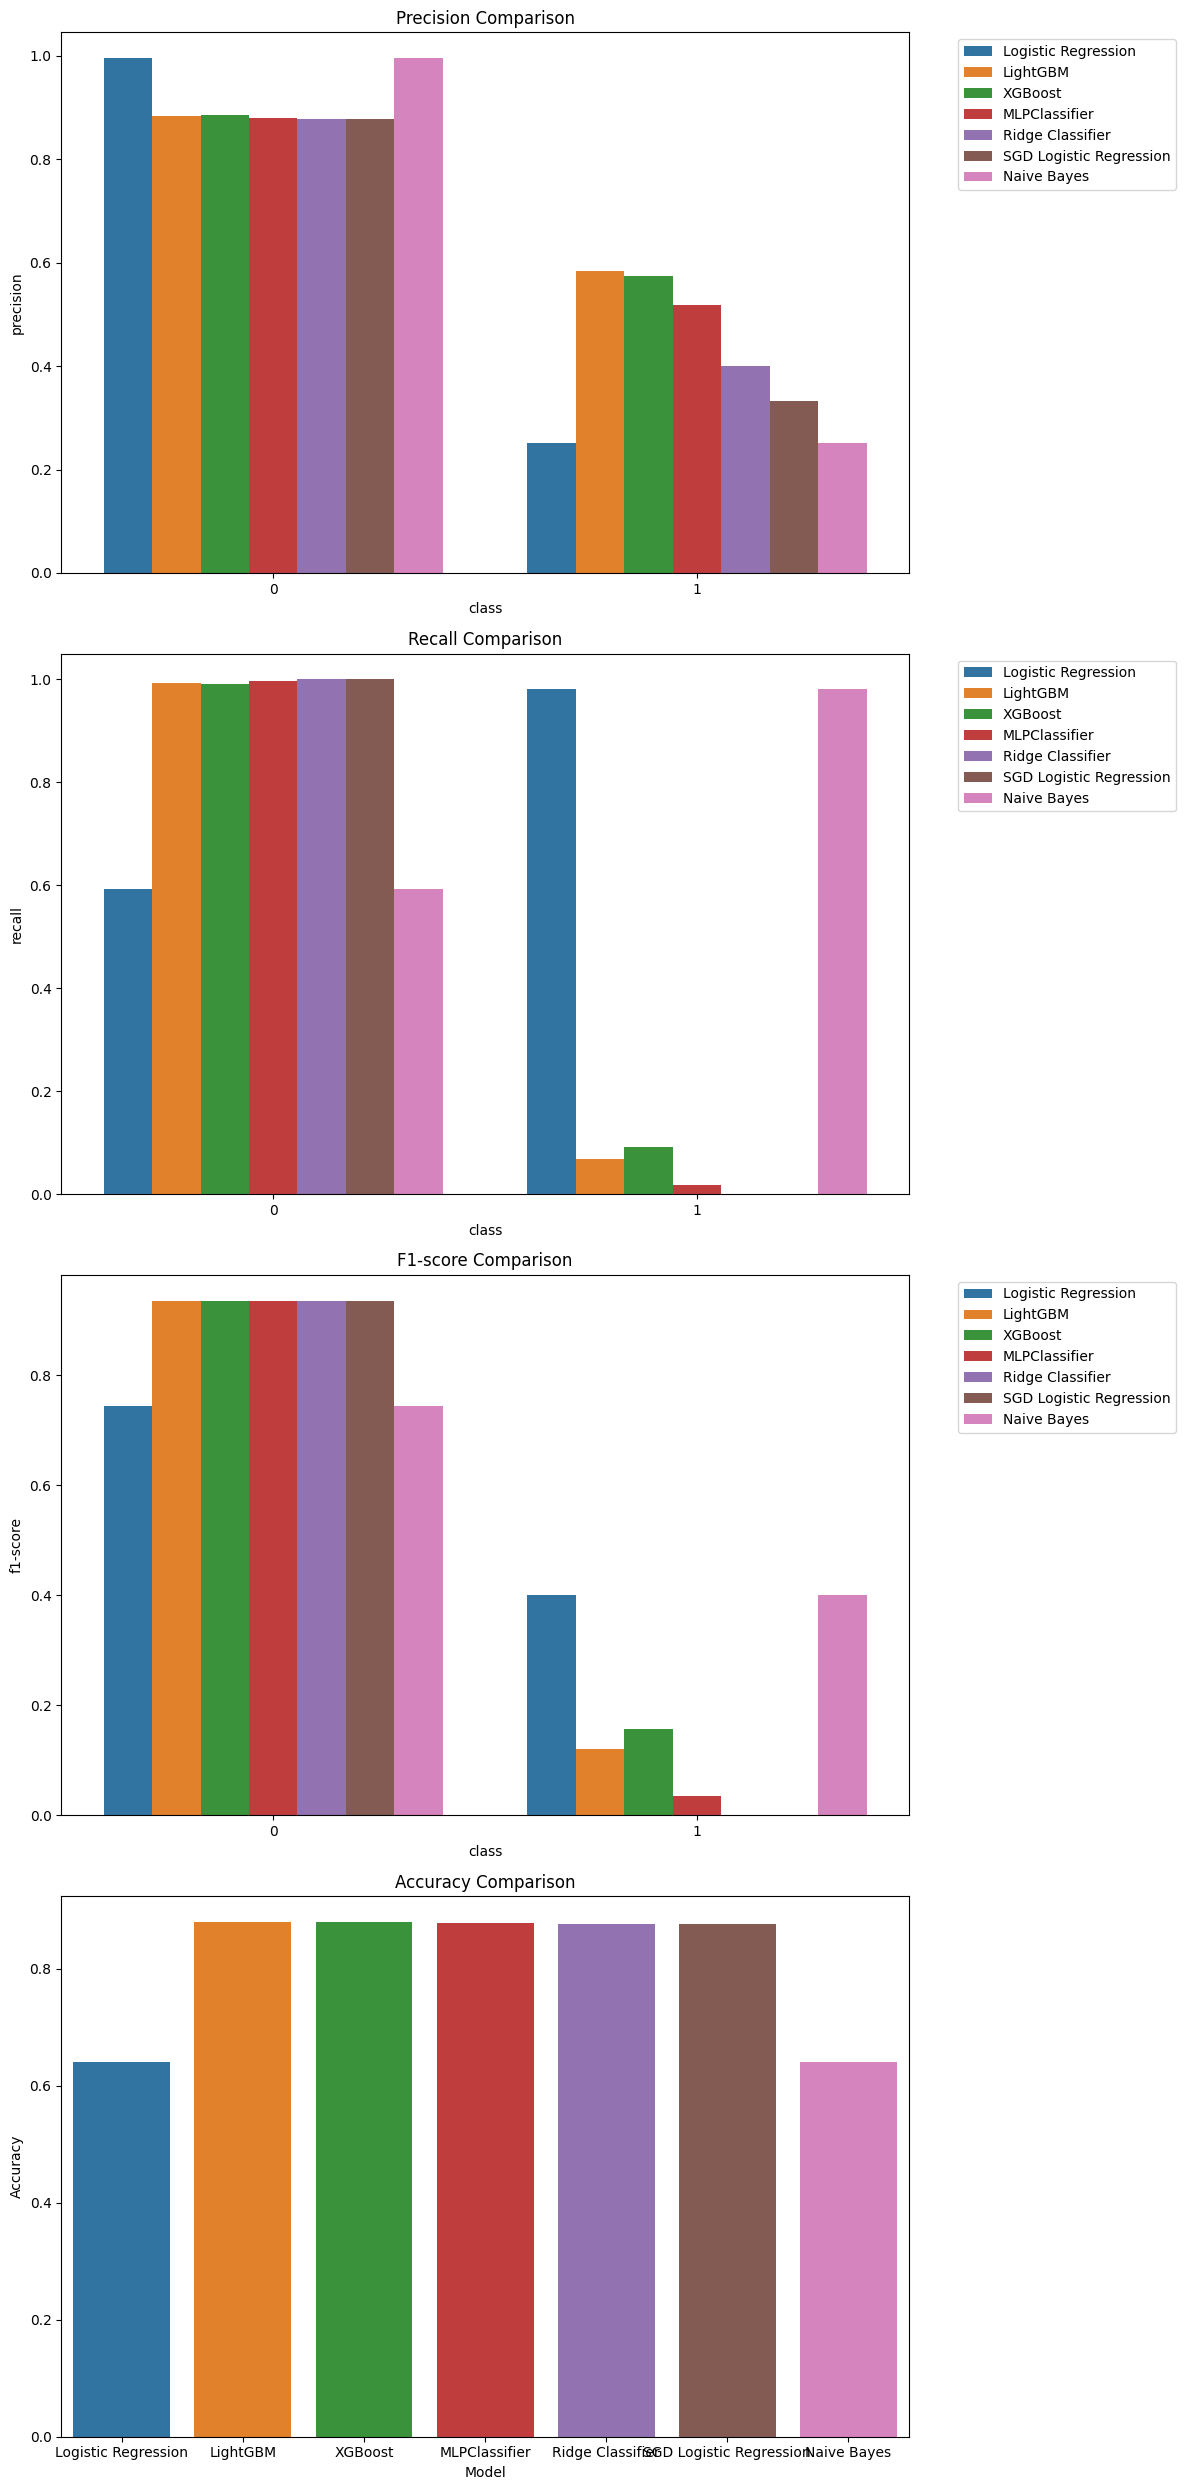

In [54]:
accuracy_data = accuracy_df.melt(id_vars=["model", "class"], value_vars=["precision"])
accuracy_data.rename(columns={"value": "accuracy"}, inplace=True)

# Plotting the class-specific metrics and accuracy
metrics = ['precision', 'recall', 'f1-score']
fig, axs = plt.subplots(len(metrics) + 1, 1, figsize=(12, 25))

# Plot precision, recall, f1-score
for i, metric in enumerate(metrics):
    sns.barplot(x='class', y=metric, hue='model', data=final_df, ax=axs[i])
    axs[i].set_title(f'{metric.capitalize()} Comparison')
    axs[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot accuracy separately
sns.barplot(x='model', y='accuracy', data=accuracy_data, ax=axs[len(metrics)])
axs[len(metrics)].set_title('Accuracy Comparison')
axs[len(metrics)].set_xlabel('Model')
axs[len(metrics)].set_ylabel('Accuracy')
axs[len(metrics)].legend().set_visible(False)

plt.tight_layout()
plt.show()